# acceptance factor of (e,e'pp)/(e,e'p) ratio 

# imports

In [1]:
from notebook_tools import *
from matplotlib.ticker import NullFormatter,MultipleLocator, FormatStrFormatter
from pylab import *
majorLocator   = MultipleLocator(0.01)
%matplotlib inline

# read data

In [2]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs500000to5018543_30SigmaT_5SigmaZa1_5SigmaZa2_5MeanZa1_5MeanZa2_10NRand_results.csv')

# histograms of fractions of lost events in each p(miss) bin

In [3]:
PmissBins = [[0.3,0.45]  , [0.45,0.55] , [0.55,0.65] , [0.65,0.75] , [0.75,1.0]]
pmiss_multiples_bins , pmiss_bin_center = [] , []
for i in range(len(PmissBins)):
    pmin , pmax = PmissBins[i][0] , PmissBins[i][1]
    for j in range(4):
        pmiss_multiples_bins.append( [ pmin + float(j*(pmax-pmin))/4 , pmin + float((j+1)*(pmax-pmin))/4 ])
print 'pmiss_multiples_bins:',pmiss_multiples_bins
for i in range( len(pmiss_multiples_bins) ):
    pmin , pmax = pmiss_multiples_bins[i][0] , pmiss_multiples_bins[i][1]
    pmiss_bin_center.append(0.5*(pmin+pmax))
print 'pmiss_bin_center:',pmiss_bin_center

pmiss_multiples_bins: [[0.3, 0.3375], [0.3375, 0.375], [0.375, 0.4125], [0.4125, 0.45], [0.45, 0.47500000000000003], [0.47500000000000003, 0.5], [0.5, 0.525], [0.525, 0.55], [0.55, 0.5750000000000001], [0.5750000000000001, 0.6000000000000001], [0.6000000000000001, 0.625], [0.625, 0.65], [0.65, 0.675], [0.675, 0.7], [0.7, 0.725], [0.725, 0.75], [0.75, 0.8125], [0.8125, 0.875], [0.875, 0.9375], [0.9375, 1.0]]
pmiss_bin_center: [0.31875, 0.35625, 0.39375, 0.43125, 0.4625, 0.48750000000000004, 0.5125, 0.5375000000000001, 0.5625, 0.5875000000000001, 0.6125, 0.6375, 0.6625000000000001, 0.6875, 0.7124999999999999, 0.7375, 0.78125, 0.84375, 0.90625, 0.96875]


(array([  603.,   468.,   920.,  2106.,  3987.,  4487.,  2909.,  1701.,
          969.,   454.]),
 array([ 0.274409  ,  0.34644645,  0.4184839 ,  0.49052135,  0.5625588 ,
         0.63459625,  0.70663369,  0.77867114,  0.85070859,  0.92274604,
         0.99478349]),
 <a list of 10 Patch objects>)

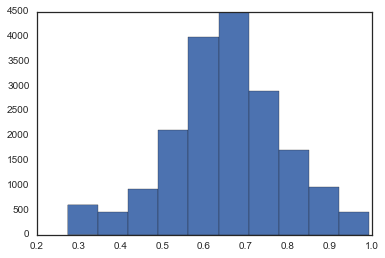

In [4]:
sims
plt.hist((9907*100-sims.NentriesSimRun)/(9907*100))

ploting loss in 0.300<p(miss)<0.338 GeV/c (loss=0.63 , corecction=2.70)
ploting loss in 0.338<p(miss)<0.375 GeV/c (loss=0.61 , corecction=2.57)
ploting loss in 0.375<p(miss)<0.412 GeV/c (loss=0.60 , corecction=2.49)
ploting loss in 0.412<p(miss)<0.450 GeV/c (loss=0.58 , corecction=2.39)
ploting loss in 0.450<p(miss)<0.475 GeV/c (loss=0.57 , corecction=2.35)
ploting loss in 0.475<p(miss)<0.500 GeV/c (loss=0.57 , corecction=2.31)
ploting loss in 0.500<p(miss)<0.525 GeV/c (loss=0.56 , corecction=2.29)
ploting loss in 0.525<p(miss)<0.550 GeV/c (loss=0.56 , corecction=2.25)
ploting loss in 0.550<p(miss)<0.575 GeV/c (loss=0.56 , corecction=2.26)
ploting loss in 0.575<p(miss)<0.600 GeV/c (loss=0.55 , corecction=2.22)
ploting loss in 0.600<p(miss)<0.625 GeV/c (loss=0.55 , corecction=2.21)
ploting loss in 0.625<p(miss)<0.650 GeV/c (loss=0.54 , corecction=2.19)
ploting loss in 0.650<p(miss)<0.675 GeV/c (loss=0.54 , corecction=2.19)
ploting loss in 0.675<p(miss)<0.700 GeV/c (loss=0.54 , corecctio

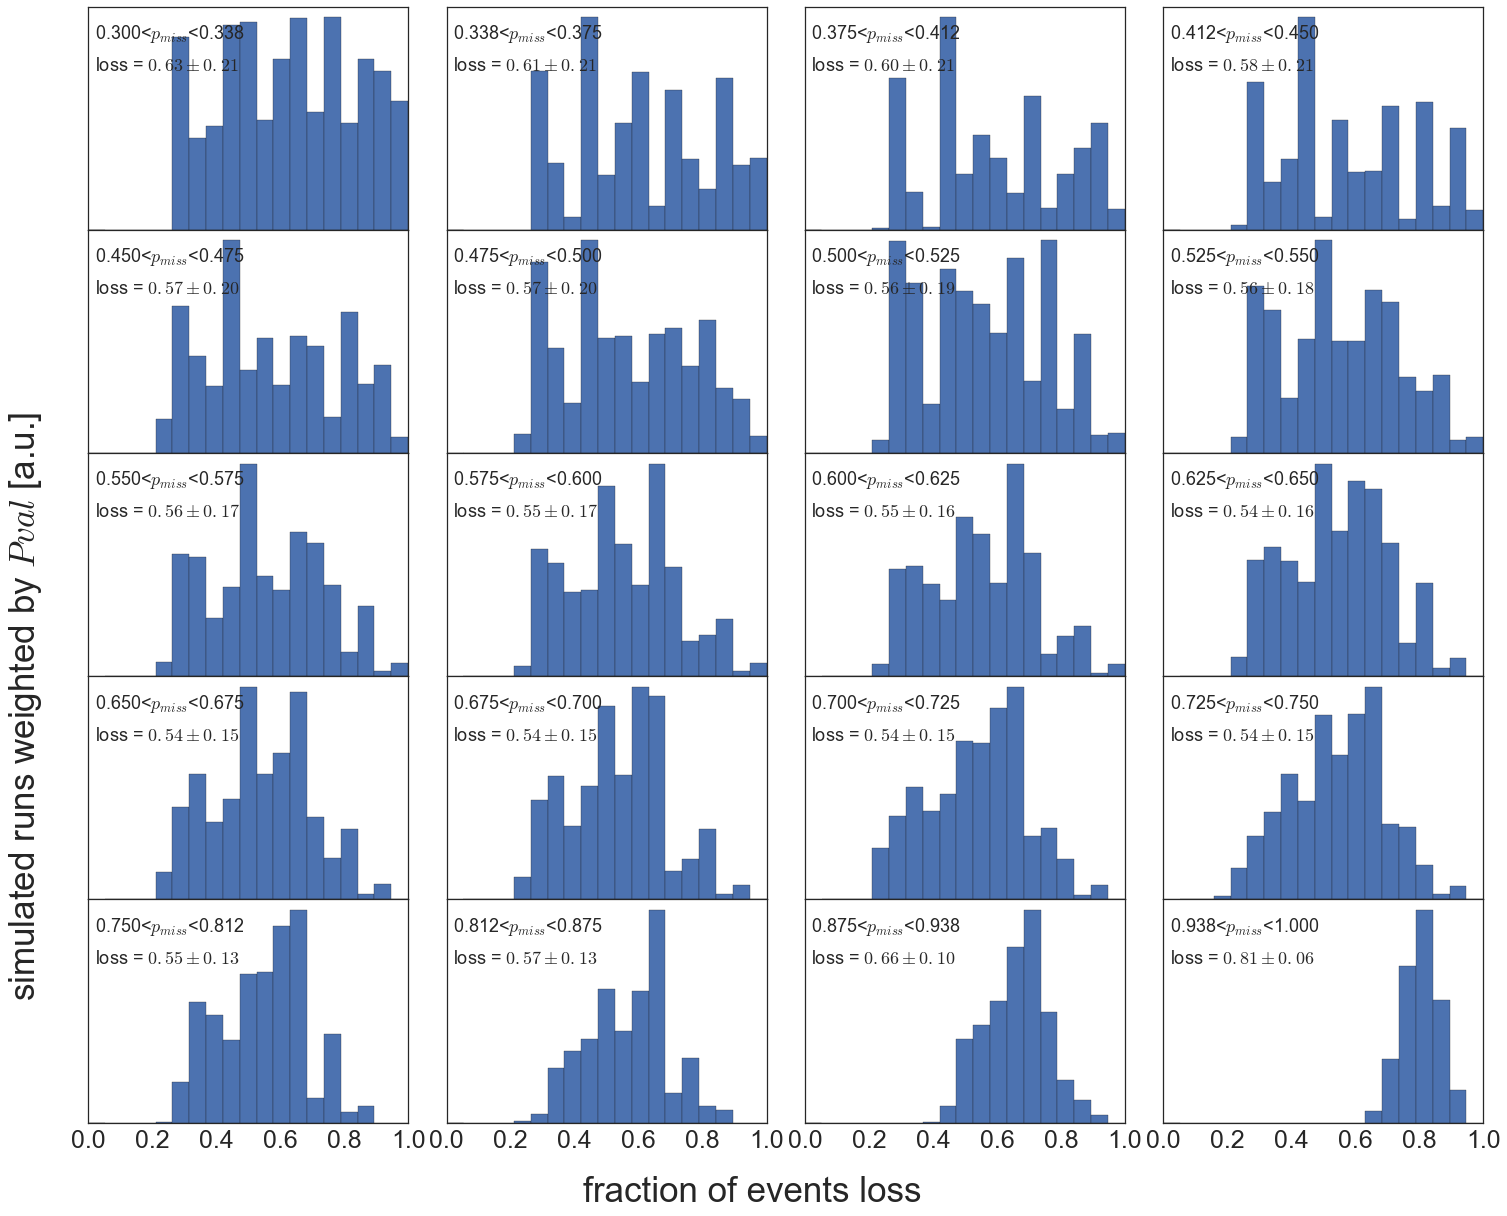

In [5]:
pmiss_bin_center , loss , loss_err , correction , correction_err = [] , [] , [] , [] , []

figure = plt.figure(figsize=(25,20))
for i in range( len(pmiss_multiples_bins) ):
    pmin , pmax = pmiss_multiples_bins[i][0] , pmiss_multiples_bins[i][1]
    pmiss_bin_center.append(0.5*(pmin+pmax))
    ax = figure.add_subplot(5,4,i+1)
    if (i < len(pmiss_multiples_bins)-4 ) :     
        ax.xaxis.set_major_formatter( NullFormatter() )
        ax.xaxis.set_major_locator( majorLocator )
    ax.yaxis.set_major_formatter( NullFormatter() )
    h , bins , patches = plt.hist( sims['fracLoss_pmiss_%.3f_%.3f'%(pmin , pmax)] , 
                                  weights = sims.PvalTotal_unweighted_12C, bins=np.linspace(0,1,20) , normed=1);
    text(0.02,0.9*h.max(),'%.3f<$p_{miss}$<%.3f'%(pmin , pmax),fontsize=18)
    loss.append(np.average(sims['fracLoss_pmiss_%.3f_%.3f'%(pmin , pmax)],weights=sims.PvalTotal_unweighted_12C))
    loss_err.append(np.sqrt(np.average( np.square(sims['fracLoss_pmiss_%.3f_%.3f'%(pmin , pmax)] - loss[-1]) ,weights=sims.PvalTotal_unweighted_12C ) ) )
    correction.append(1./(1-loss[-1]))
    correction_err.append(loss_err[-1]/np.square(1-loss[-1]))


    text(0.02,0.75*h.max(),'loss = $%.2f\\pm%.2f$'%(loss[-1],loss_err[-1]),fontsize=18)
    set_axes( ax , '' , '' )
    ax.set_ylim(0,1.05*h.max())
    print 'ploting loss in %.3f<p(miss)<%.3f GeV/c (loss=%.2f , corecction=%.2f)'%(pmin , pmax , loss[-1],correction[-1])

subplots_adjust(wspace=0.12,hspace=0)
figtext(0.4,0.07,"fraction of events loss",fontdict={'fontsize':35})
figtext(0.08,0.6,"simulated runs weighted by $Pval$ [a.u.]",fontdict={'fontsize':35},rotation=90)
plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/fractionOfLossIn20PmissBins.pdf')

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:2790: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


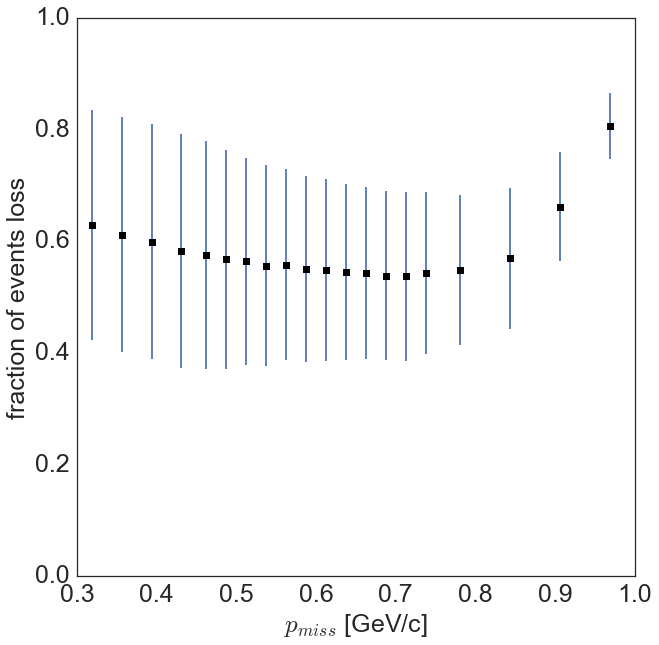

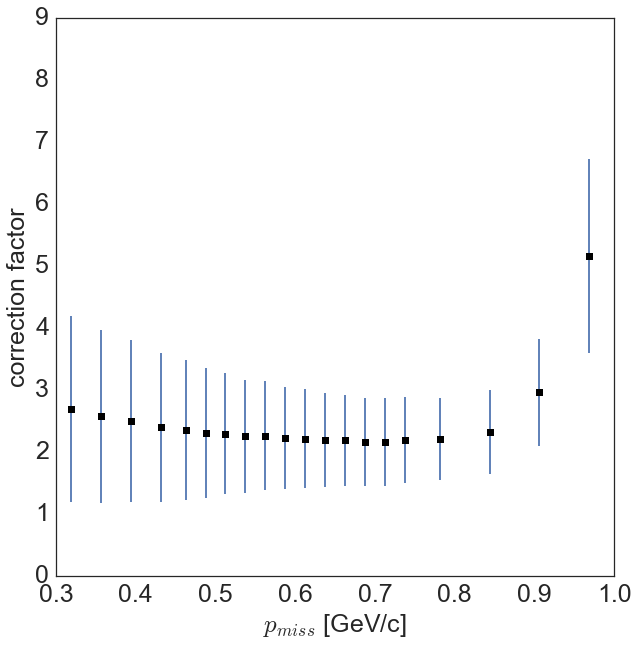

In [6]:
fig,ax=plt.subplots(figsize=(10,10))
plt.plot(pmiss_bin_center,loss, marker='s', color='black' ,linewidth=0)
ax.errorbar(pmiss_bin_center,loss,yerr=loss_err,fmt=None, color='black',error_kw=dict(ecolor='red', lw=2, capsize=5, capthick=2))
ax.set_ylim(0,1)
set_axes(ax,x_label='$p_{miss}$ [GeV/c]',y_label='fraction of events loss')
plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/fractionOfLossVsPmiss.pdf')

fig,ax=plt.subplots(figsize=(10,10))
plt.plot(pmiss_bin_center,correction, marker='s', color='black' ,linewidth=0)
ax.errorbar(pmiss_bin_center,correction,yerr=correction_err,fmt=None, color='black',error_kw=dict(ecolor='red', lw=2, capsize=5, capthick=2))
ax.set_ylim(0,9)
set_axes(ax,x_label='$p_{miss}$ [GeV/c]',y_label='correction factor')
plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/eepp_eep_correctionVsPmiss.pdf')

# (e,e'pp)/(e,e'p) ratio from DATA before acceptance correction

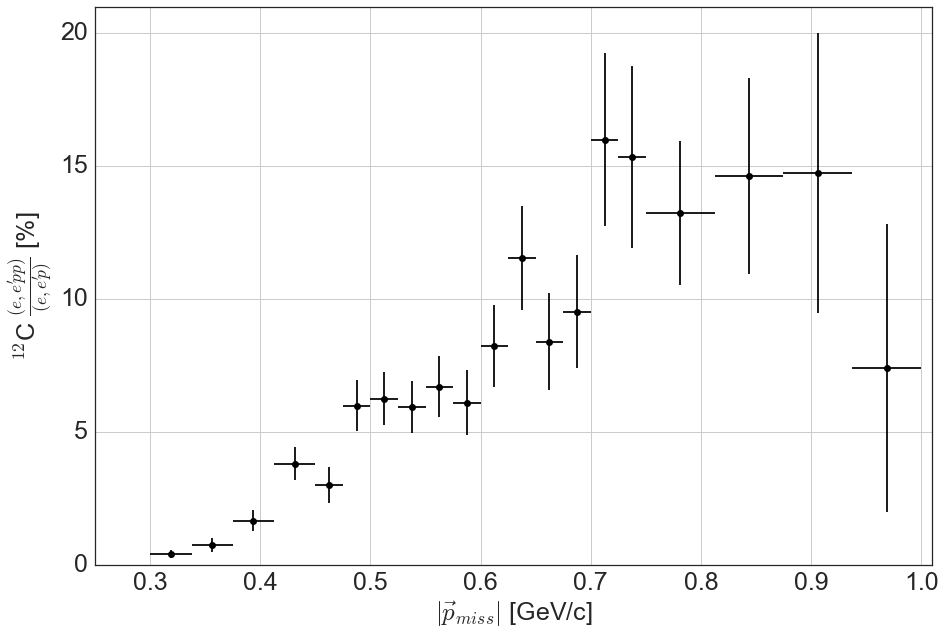

In [7]:
target = 'C12'
name = '$^{12}$C'
eep = TPlots('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_eep_in_ppSRCCut_DATA_%s.root'%target , 'anaTree')
eepp = TPlots('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_ppSRCCut_DATA_%s.root'%target , 'anaTree')

fig,ax = plt.subplots(figsize=(15,10))
pmiss_bin_width  , eep_in_bin , eepp_in_bin , ratio , ratio_err = [] , [] , [] , [] , []
for i in range( len(pmiss_multiples_bins) ):
    pmin , pmax = pmiss_multiples_bins[i][0] , pmiss_multiples_bins[i][1]
    pmiss_bin_width.append( 0.5*(pmax - pmin) )
    eep_in_bin.append( eep.GetEntries(ROOT.TCut("%f<Pmiss3Mag && Pmiss3Mag<%f"%(pmin , pmax))) )
    eepp_in_bin.append( eepp.GetEntries(ROOT.TCut("%f<Pmiss3Mag && Pmiss3Mag<%f"%(pmin , pmax))) )
    ratio.append(100*float(eepp_in_bin[-1])/eep_in_bin[-1])
    ratio_err.append(ratio[-1] * np.sqrt(1./eepp_in_bin[-1] + 1./eep_in_bin[-1]))


eep.Close()
eepp.Close()
plt.errorbar(pmiss_bin_center,ratio,xerr=pmiss_bin_width,yerr=ratio_err,fmt='ro', color='black')
set_axes(ax , x_label=r'$|\vec{p}_{miss}|$ [GeV/c]',y_label= r"%s ${\frac{(e,e'pp)}{(e,e'p)}}$"%name + ' [%]')
ax.grid()
ax.set_ylim(0,21)
ax.set_xlim(0.25,1.01)
fig.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/C_eepp_eep_NotCorrectedForAcceptance.pdf')

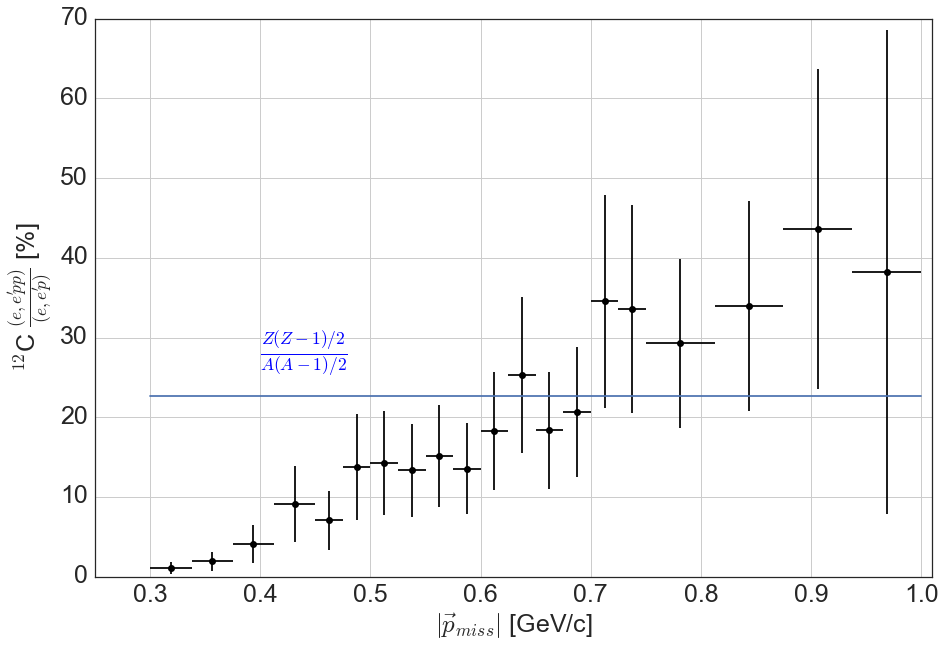

In [8]:
target = 'C12'
name = '$^{12}$C'

fig,ax = plt.subplots(figsize=(15,10))
ratio_corrected , ratio_corrected_err = [] , [] 
for i in range( len(ratio) ):
    ratio_corrected.append(ratio[i] * correction[i])
    ratio_corrected_err.append( ratio_corrected[-1] * np.sqrt( np.square(ratio_err[i]/ratio[i]) + np.square(correction_err[i]/correction[i]) ))


plt.errorbar(pmiss_bin_center,ratio_corrected,xerr=pmiss_bin_width,yerr=ratio_corrected_err,fmt='ro', color='black')
set_axes(ax , x_label=r'$|\vec{p}_{miss}|$ [GeV/c]',y_label= r"%s ${\frac{(e,e'pp)}{(e,e'p)}}$"%name + ' [%]')
ax.grid()
# ax.set_ylim(0,21)
ax.set_xlim(0.25,1.01)
line = Line2D([0.3,1], [100*(6.*(6.-1.)/2)/(12.*(12.-1.)/2),100*(6.*(6.-1.)/2)/(12.*(12.-1.)/2)])
ax.add_line(line)
plt.text(0.4,120*(6.*(6.-1.)/2)/(12.*(12.-1.)/2),'$\\frac{Z(Z-1)/2}{A(A-1)/2}$',fontsize=25,color='blue')
    
fig.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/C_eepp_eep_acceptanceCorrected.pdf')

# in bins of Q2 and p(miss)

In [4]:
Q2Bins = [[0,1.5] , [1.5,2], [2,2.5], [2.5,5]]
PmissBins = [[0.3,0.45] , [0.45,0.55] , [0.55,0.65] , [0.65,0.75] , [0.75,1.0]]
Q2_bin_center = [] 
for j in range( len(Q2Bins) ):
    Q2min , Q2max = Q2Bins[j][0] , Q2Bins[j][1]
    Q2_bin_center.append(0.5*(Q2min+Q2max))
print 'Q2_bin_center:',Q2_bin_center

Q2_bin_center: [0.75, 1.75, 2.25, 3.75]


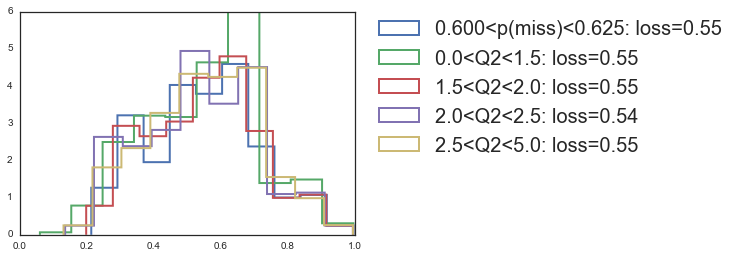

In [5]:
pmin , pmax = 0.6 , 0.625 
weights = sims.PvalTotal_unweighted_12C
loss = np.average(sims['fracLoss_pmiss_%.3f_%.3f'%(pmin , pmax )],weights=weights)
plt.hist(sims['fracLoss_pmiss_%.3f_%.3f'%(pmin , pmax )],weights=weights,histtype='step',label='%.3f<p(miss)<%.3f: loss=%.2f'%(pmin , pmax,loss ),linewidth=2)
for j in range( len(Q2Bins) ):
    Q2min , Q2max = Q2Bins[j][0] , Q2Bins[j][1]
    loss = np.average(sims['fracLoss_pmiss_%.3f_%.3f_Q2bin_%.1f_%.1f'%(pmin , pmax , Q2min , Q2max)],weights=weights)
    plt.hist(sims['fracLoss_pmiss_%.3f_%.3f_Q2bin_%.1f_%.1f'%(pmin , pmax , Q2min , Q2max)],weights=weights,histtype='step',label='%.1f<Q2<%.1f: loss=%.2f'%(Q2min , Q2max,loss),linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. , fontsize=20)

In [7]:
do_plot=False
loss_q2pm = np.zeros(( len(Q2Bins) , len(pmiss_multiples_bins) ))
loss_err_q2pm = np.zeros(( len(Q2Bins) , len(pmiss_multiples_bins) ))
correction_q2pm = np.zeros(( len(Q2Bins) , len(pmiss_multiples_bins) ))
correction_err_q2pm = np.zeros(( len(Q2Bins) , len(pmiss_multiples_bins) ))

for j in range( len(Q2Bins) ):
    Q2min , Q2max = Q2Bins[j][0] , Q2Bins[j][1]

    if do_plot:figure = plt.figure(figsize=(25,20))
    for i in range( len(pmiss_multiples_bins) ):
        pmin , pmax = pmiss_multiples_bins[i][0] , pmiss_multiples_bins[i][1]
        if do_plot:
            ax = figure.add_subplot(5,4,i+1)
            if (i < len(pmiss_multiples_bins)-4 ) :     
                ax.xaxis.set_major_formatter( NullFormatter() )
                ax.xaxis.set_major_locator( majorLocator )
            ax.yaxis.set_major_formatter( NullFormatter() )
        
        array = sims['fracLoss_pmiss_%.3f_%.3f_Q2bin_%.1f_%.1f'%(pmin , pmax , Q2min , Q2max)]
        weights = sims.PvalTotal_unweighted_12C
        if do_plot: 
            h , bins , patches = plt.hist( array, weights = weights, bins=np.linspace(0,1,20) , normed=1);
            
        loss_q2pm[j][i] = np.average(array , weights=weights)
        loss_err_q2pm[j][i] = np.sqrt(np.average( np.square(array - loss_q2pm[j][i]) , weights=weights) ) 
        correction_q2pm[j][i] = 1./(1-loss_q2pm[j][i])
        correction_err_q2pm[j][i] = loss_err_q2pm[j][i]/np.square(1-loss_q2pm[j][i])

        if do_plot:
            text(0.02,0.9*h.max(),'%.3f<$p_{miss}$<%.3f'%(pmin , pmax),fontsize=18)
            text(0.02,0.75*h.max(),'loss = $%.2f\\pm%.2f$'%(loss_q2pm[j][i],loss_err_q2pm[j][i]),fontsize=18)
            set_axes( ax , '' , '' )
            ax.set_ylim(0,1.05*h.max())
        print 'ploting loss for %.2f<Q2<%.2f, %.3f<p(miss)<%.3f (loss=%f, corecction=%f)'%(Q2min , Q2max ,pmin , pmax, loss_q2pm[j][i], correction_q2pm[j][i])

    if do_plot:
        subplots_adjust(wspace=0.12,hspace=0)
        figtext(0.3,0.07,"fraction of events loss in %.2f<Q2<%.2f (GeV/c)$^2$"%(Q2min,Q2max),fontdict={'fontsize':35})
        figtext(0.08,0.6,"simulated runs weighted by $Pval$ [a.u.]",fontdict={'fontsize':35},rotation=90)
        plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/fractionOfLossIn20PmissBins_Q2bin_%.2f_%.2f.pdf'%(Q2min,Q2max))

ploting loss for 0.00<Q2<1.50, 0.300<p(miss)<0.338 (loss=0.628081, corecction=2.688760)
ploting loss for 0.00<Q2<1.50, 0.338<p(miss)<0.375 (loss=0.611157, corecction=2.571729)
ploting loss for 0.00<Q2<1.50, 0.375<p(miss)<0.412 (loss=0.603726, corecction=2.523507)
ploting loss for 0.00<Q2<1.50, 0.412<p(miss)<0.450 (loss=0.580652, corecction=2.384657)
ploting loss for 0.00<Q2<1.50, 0.450<p(miss)<0.475 (loss=0.590677, corecction=2.443057)
ploting loss for 0.00<Q2<1.50, 0.475<p(miss)<0.500 (loss=0.567233, corecction=2.310715)
ploting loss for 0.00<Q2<1.50, 0.500<p(miss)<0.525 (loss=0.559588, corecction=2.270600)
ploting loss for 0.00<Q2<1.50, 0.525<p(miss)<0.550 (loss=0.557876, corecction=2.261808)
ploting loss for 0.00<Q2<1.50, 0.550<p(miss)<0.575 (loss=0.559319, corecction=2.269217)
ploting loss for 0.00<Q2<1.50, 0.575<p(miss)<0.600 (loss=0.551439, corecction=2.229350)
ploting loss for 0.00<Q2<1.50, 0.600<p(miss)<0.625 (loss=0.546552, corecction=2.205325)
ploting loss for 0.00<Q2<1.50, 0

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:2790: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


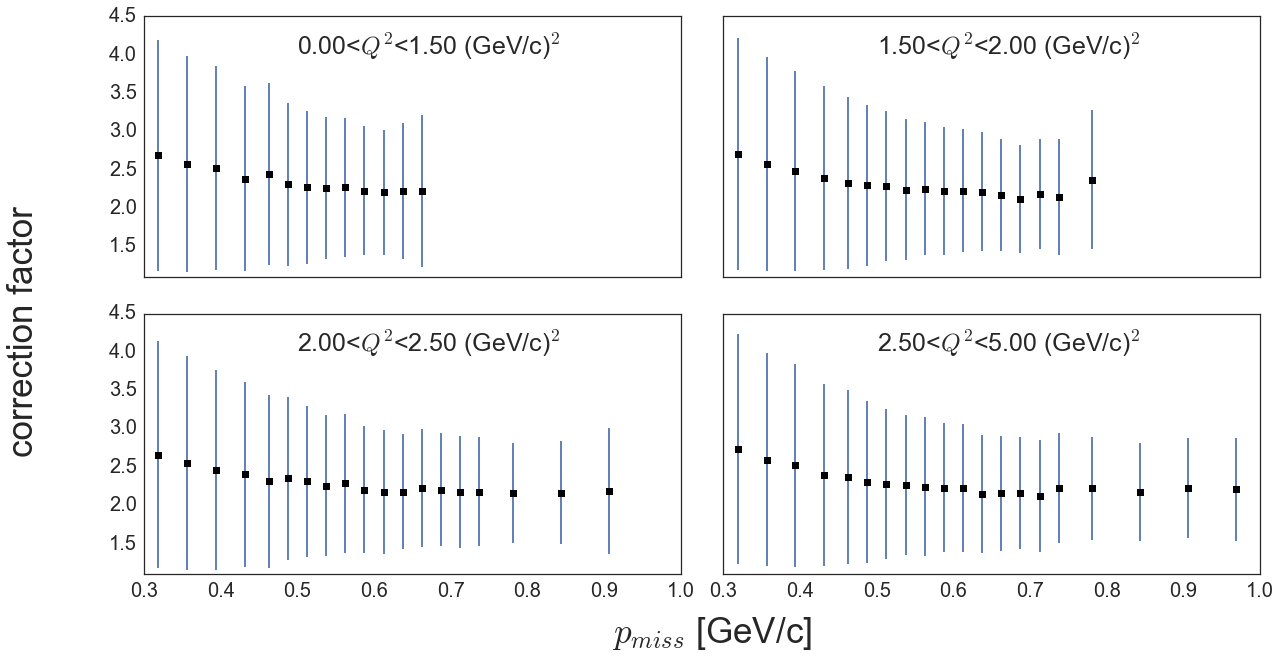

In [8]:
fig=plt.figure(figsize=(20,10))
for j in range( len(Q2Bins) ):
    ax = fig.add_subplot(2,2,j+1)
    Q2min , Q2max = Q2Bins[j][0] , Q2Bins[j][1]
    plt.plot(pmiss_bin_center,correction_q2pm[j], marker='s', color='black' ,linewidth=0)
    ax.errorbar(pmiss_bin_center,correction_q2pm[j],yerr=correction_err_q2pm[j],
                fmt=None, color='black',error_kw=dict(lw=2, capsize=5, capthick=2),label="%.2f<$Q^2$<%.2f (GeV/c)$^2$"%(Q2min,Q2max))
    if (j < len(Q2Bins)-2 ) :     
        ax.xaxis.set_major_formatter( NullFormatter() )
        ax.xaxis.set_major_locator( majorLocator )
    if (j==1 or j==3):     
        ax.yaxis.set_major_formatter( NullFormatter() )
    ax.set_ylim(1.1,4.5)
    set_axes(ax,x_label='',y_label='',fontsize=20)
    plt.text(0.5,4,"%.2f<$Q^2$<%.2f (GeV/c)$^2$"%(Q2min,Q2max),fontsize=25)

subplots_adjust(wspace=0.08,hspace=0.14)
figtext(0.45,0.03,"$p_{miss}$ [GeV/c]",fontdict={'fontsize':35})
figtext(0.03,0.6,"correction factor",fontdict={'fontsize':35},rotation=90)
plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/eepp_eep_correctionVsPmiss_Q2bins.pdf')


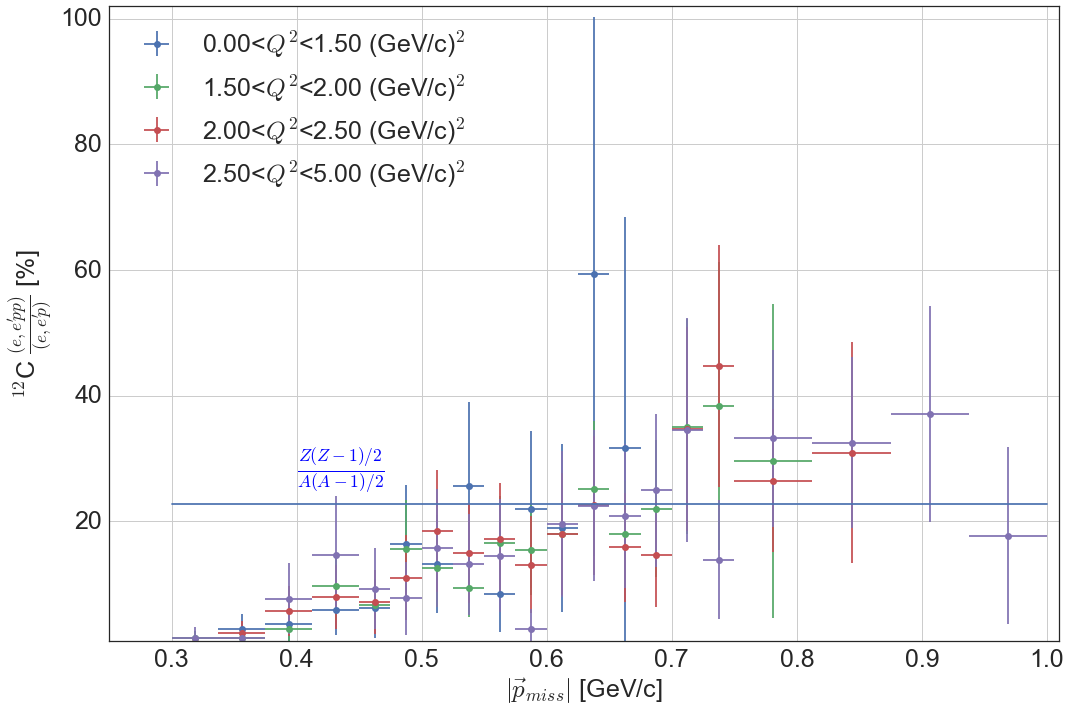

In [33]:
do_print = False
target = 'C12'
name = '$^{12}$C'

eep = TPlots('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_eep_in_ppSRCCut_DATA_%s.root'%target , 'anaTree')
eepp = TPlots('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_ppSRCCut_DATA_%s.root'%target , 'anaTree')

pmiss_bin_width = []
labels = []
rows,cols=len(Q2Bins) , len(pmiss_multiples_bins)
eep_in_bin , eepp_in_bin = np.zeros((rows,cols)) , np.zeros((rows,cols))
ratio , ratio_err = -100*np.zeros((rows,cols)) , -100*np.zeros((rows,cols))
ratio_corrected , ratio_corrected_err = np.zeros((rows,cols)) , np.zeros((rows,cols))


for j in range( len(Q2Bins) ):
    Q2min , Q2max = Q2Bins[j][0] , Q2Bins[j][1]
    q2_cut = ROOT.TCut("%f<Q2 && Q2<%f"%(Q2min , Q2max))


    for i in range( len(pmiss_multiples_bins) ):
        pmin , pmax = pmiss_multiples_bins[i][0] , pmiss_multiples_bins[i][1]
        if j==0: pmiss_bin_width.append( 0.5*(pmax - pmin) )
        pmiss_cut = ROOT.TCut("%f<Pmiss3Mag && Pmiss3Mag<%f"%(pmin , pmax))
        eep_in_bin[j][i] = eep.GetEntries(pmiss_cut+q2_cut)
        eepp_in_bin[j][i] = eepp.GetEntries(pmiss_cut+q2_cut)
        ratio[j][i] = 100*float(eepp_in_bin[j][i])/eep_in_bin[j][i] if eep_in_bin[j][i]>0 else -100
        ratio_err[j][i] = ratio[j][i] * np.sqrt(1./eepp_in_bin[j][i] + 1./eep_in_bin[j][i]) if eep_in_bin[j][i]>0 else -100
        ratio_corrected[j][i] = ratio[j][i] * correction_q2pm[j][i]
        ratio_corrected_err[j][i] = ratio_corrected[j][i] * np.sqrt(
            np.square(ratio_err[j][i]/ratio[j][i]) 
            + np.square(correction_err_q2pm[j][i]/correction_q2pm[j][i]) )

        if do_print: print 'ratio for %.2f<$Q^2$<%.2f and %.3f<p(miss)<%.3f = %.3f+/-%.3f'%(Q2min , Q2max,pmin , pmax,ratio[j][i],ratio_err[j][i])
    

eep.Close()
eepp.Close()

# fig,ax = plt.subplots(figsize=(15,10))

# for j in range( len(Q2Bins) ):
#     plt.errorbar(pmiss_bin_center,ratio[j],xerr=pmiss_bin_width,yerr=ratio_err[j],fmt='o',label=labels[-1])
# set_axes(ax , x_label=r'$|\vec{p}_{miss}|$ [GeV/c]',y_label= r"%s ${\frac{(e,e'pp)}{(e,e'p)}}$"%name + ' [%]')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. , fontsize=25)
# ax.grid()
# ax.set_ylim(1,42)
# ax.set_xlim(0.25,1.01)
# fig.tight_layout()
# fig.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/C_eepp_eep_NotCorrectedForAcceptance_Q2bins.pdf')

fig,ax = plt.subplots(figsize=(15,10))
for j in range( len(Q2Bins) ):
    Q2min , Q2max = Q2Bins[j][0] , Q2Bins[j][1]
    plt.errorbar(pmiss_bin_center,ratio_corrected[j],xerr=pmiss_bin_width,yerr=ratio_corrected_err[j],fmt='o',label="%.2f<$Q^2$<%.2f (GeV/c)$^2$"%(Q2min,Q2max))
set_axes(ax , x_label=r'$|\vec{p}_{miss}|$ [GeV/c]',y_label= r"%s ${\frac{(e,e'pp)}{(e,e'p)}}$"%name + ' [%]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. , fontsize=25)
ax.grid()
ax.set_ylim(1,102)
ax.set_xlim(0.25,1.01)
line = Line2D([0.3,1], [100*(6.*(6.-1.)/2)/(12.*(12.-1.)/2),100*(6.*(6.-1.)/2)/(12.*(12.-1.)/2)])
ax.add_line(line)
plt.text(0.4,120*(6.*(6.-1.)/2)/(12.*(12.-1.)/2),'$\\frac{Z(Z-1)/2}{A(A-1)/2}$',fontsize=25,color='blue')
ax.legend(loc='upper left', fontsize=25)
fig.tight_layout()
fig.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/C_eepp_eep_acceptanceCorrected_Q2bins.pdf')